In [ ]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [1]:
from Lopez import PAHPipeline, observations

# === Step 1. Compute Cascade Once Using a Baseline Height (e.g. 900 km) ===

# Choose a baseline height for which to compute the heavy cascade.
baseline_height = 900
pipeline = PAHPipeline(version="1.20", height=baseline_height, filter_version="short")

# Compute and store the intermediate results.
pahdb = pipeline.get_pahdb_instance()
baseline_obs = pipeline.get_observations()  # This observation is only used for computing the cascade.
transitions = pipeline.get_transitions()
spectrum = pipeline.get_spectrum()          # This step is expensive.

                  NO UPDATE AVAILABLE                  

             RESTORING DATABASE FROM CACHE             

==
FILENAME                    : /var/folders/vv/2nq91_0d0lsfm6gcskyz__r40000gn/T/a80b922979ad89624d56b35e6a3a1f28.pkl
ORIGNINAL FILENAME          : /Users/floorstikkelbroeck/Documents/Titan/PAHdb/pahdb-theoretical-v1.20.xml
PARSE TIME                  : 0:00:00.093657
DATABASE                    : theoretical
VERSION (DATE)              : 1.20 (2011-01-13)
COMMENT                     : 

This is the NASA Ames PAH IR Spectroscopic Database. The contents of
the database are described in Bauschlicher et al. (2010), Boersma et
al. (2014) and Mattioda et al. (2020). The database website is located
at https://www.astrochemistry.org/pahdb/.

You are kindly asked to cite the following papers when using the database:

    Boersma, C., Bauschlicher, C.W., Jr., Ricca, A., Mattioda, A. L.,
    Cami, J., Peeters, E., Sánchez de Armas, F., Puerta Saborido, G.,
    Hudgins, D M., and All

 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 1000/1000 [00:01<00:00, 643.94samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 1000/1000 [00:01<00:00, 637.15samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 1000/1000 [00:01<00:00, 535.37samples/s]



=== Monte Carlo Fit Results ===
Height: 900 km


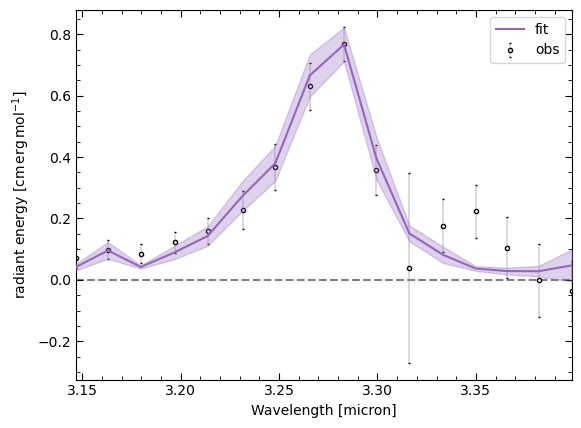

Height: 950 km


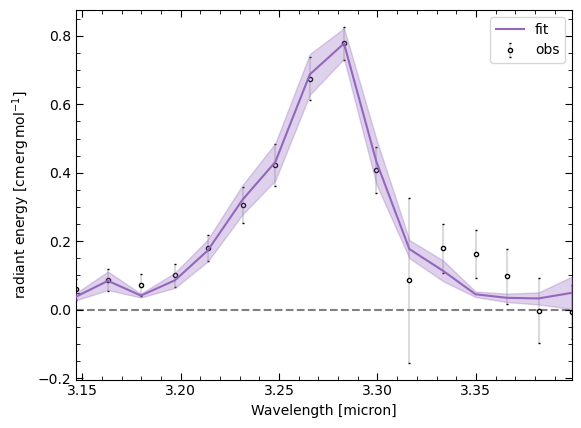

Height: 1000 km


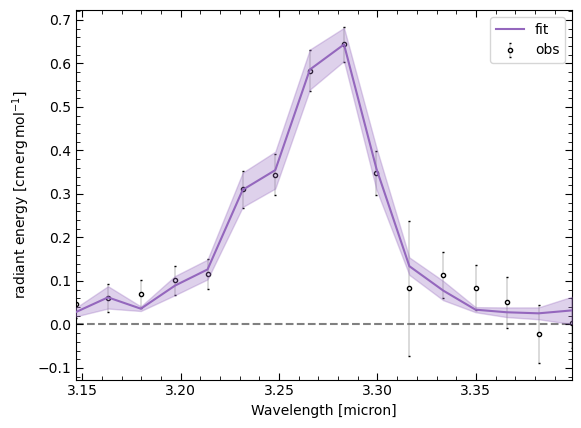

In [2]:
# Since the observation grid is identical for all heights, we can reuse the precomputed cascade (spectrum).
# We simply create new observation objects for each height and run the MC fit.
heights = [900, 950, 1000]
mc_fit_results = {}

for h in heights:
    # For the baseline height, reuse the previously computed observation.
    if h == baseline_height:
        obs = baseline_obs
    else:
        # For a new height, create a new observation (with the same grid)
        obs = observations(height=h)
    # Run the Monte Carlo fit on the precomputed spectrum
    mc_fit = spectrum.mcfit(obs, samples=1000, multiprocessing=False)
    mc_fit_results[h] = mc_fit

# Display the Monte Carlo fit results for each height.
print("\n=== Monte Carlo Fit Results ===")
for h, result in mc_fit_results.items():
    print(f"Height: {h} km")
    result.plot(wavelength=True)

# Perform the Monte Carlo Fitting

In [3]:
# Fit the spectrum using Monte Carlo approach for all tangent heights.
mc_fit_results = {}

for h in heights:
    # For the baseline height, reuse the previously computed observation.
    if h == baseline_height:
        obs = baseline_obs
    else:
        # For a new height, create a new observation (with the same grid)
        obs = observations(height=h)
    
    # Run the Monte Carlo fit on the precomputed spectrum
    mc_fit_results[h] = {
        'mcfit10': spectrum.mcfit(obs, samples=10, multiprocessing=False),
        # 'mcfit50': spectrum.mcfit(obs, samples=50, multiprocessing=False),
        'mcfit100': spectrum.mcfit(obs, samples=100, multiprocessing=False),
        # 'mcfit200': spectrum.mcfit(obs, samples=200, multiprocessing=False),
        # 'mcfit500': spectrum.mcfit(obs, samples=500, multiprocessing=False),
        'mcfit1000': spectrum.mcfit(obs, samples=1000, multiprocessing=False),
        # 'mcfit2000': spectrum.mcfit(obs, samples=2000, multiprocessing=False),
        # 'mcfit5000': spectrum.mcfit(obs, samples=5000, multiprocessing=False),
        'mcfit10000': spectrum.mcfit(obs, samples=10000, multiprocessing=False)
    }

 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 10/10 [00:00<00:00, 536.80samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 100/100 [00:00<00:00, 720.71samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 1000/1000 [00:01<00:00, 740.46samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 10000/10000 [00:15<00:00, 662.68samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 10/10 [00:00<00:00, 622.67samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 100/100 [00:00<00:00, 680.84samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 1000/1000 [00:01<00:00, 671.40samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 10000/10000 [00:17<00:00, 584.53samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 10/10 [00:00<00:00, 566.55samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 100/100 [00:00<00:00, 605.24samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 1000/1000 [00:01<00:00, 605.44samples/s]


 NOTICE: PLEASE TAKE CONSIDERABLE CARE WHEN INTERPRETING 
 THESE RESULTS AND PUTTING THEM IN AN ASTRONOMICAL       
 CONTEXT. THERE ARE MANY SUBTLETIES THAT NEED TO BE TAKEN
 INTO ACCOUNT, RANGING FROM PAH SIZE, INCLUSION OF       
 HETEROATOMS, ETC. TO DETAILS OF THE APPLIED EMISSION    
 MODEL, BEFORE ANY THOROUGH ASSESSMENT CAN BE MADE.      



samples: 100%|██████████| 10000/10000 [00:17<00:00, 559.31samples/s]


In [4]:
# Iterate through the heights and their corresponding mc_fit results
for height, fits in mc_fit_results.items():
    for key, mcfit in fits.items():
        mc_fit_results[height][key] = mcfit.get()

In [5]:
def Calculate_rings(mc_fit_results, max_rings=150):
    """
    Calculates the concentration-weighted mean number of rings, mass, and area
    for each height and each MC sample size.

    Parameters:
    - mc_fit_results: Dictionary containing MC fits at different heights and MC samples.
    - max_rings: Maximum allowed ring count before marking as an outlier.

    Returns:
    - results_dict: Dictionary structured as {height: {mcfit_size: results}}
    """
    results_dict = {}

    for h, mc_fits in mc_fit_results.items():  # Loop over heights
        results_dict[h] = {}  # Initialize dictionary for this height

        for mc_key, mcfit_got in mc_fits.items():  # Loop over MC sample sizes
            average_rings_per_run = []
            average_masses_per_run = []
            average_areas_per_run = []

            for fit in mcfit_got['mcfits']:
                uids = fit['uids']
                weights = fit['weights']

                geometry = pahdb.getgeometrybyuid(uids)
                rings = geometry.rings()
                masses = geometry.mass()
                areas = geometry.area()

                # Identify PAHs that exceed the ring threshold
                outlier_uids = [uid for uid in uids if sum(rings[uid].values()) > max_rings]

                if outlier_uids:
                    print(f"Excluding {len(outlier_uids)} PAHs with >{max_rings} rings at height {h}, MC fit {mc_key}: {outlier_uids}")

                    # Only exclude if NOT all PAHs are outliers
                    if len(outlier_uids) < len(uids):
                        uids = [uid for uid in uids if uid not in outlier_uids]
                        weights = {uid: weight for uid, weight in weights.items() if uid not in outlier_uids}
                    else:
                        print(f"Keeping all PAHs for height {h}, MC fit {mc_key} to avoid full removal.")

                # Normalize weights
                total_weight = sum(weights.values())
                normalized_weights = {uid: weight / total_weight for uid, weight in weights.items()} if total_weight > 0 else {}

                # Compute weighted properties
                weighted_rings = sum(
                    (max([count for count in rings[uid].values() if count > 0]) if any(rings[uid].values()) else 0)
                    * normalized_weights[uid]
                    for uid in uids
                ) if normalized_weights else 0

                weighted_masses = sum(
                    (max(masses[uid].values()) if isinstance(masses[uid], dict) else masses[uid]) * normalized_weights[uid]
                    for uid in uids
                ) if normalized_weights else 0

                weighted_areas = sum(
                    areas[uid] * normalized_weights[uid] for uid in uids
                ) if normalized_weights else 0

                # Store results per run
                average_rings_per_run.append(weighted_rings)
                average_masses_per_run.append(weighted_masses)
                average_areas_per_run.append(weighted_areas)

            # Compute the overall mean and statistical metrics for this height & MC fit
            overall_average_rings = np.mean(average_rings_per_run)
            std_dev = np.std(average_rings_per_run, ddof=1)
            sem = std_dev / np.sqrt(len(average_rings_per_run))

            results_rings = [overall_average_rings, std_dev, sem]
            other_results = [np.mean(average_masses_per_run), np.mean(average_areas_per_run)]

            results_dict[h][mc_key] = {'rings': results_rings, 'mass_area': other_results}

    return results_dict


In [6]:
results = Calculate_rings(mc_fit_results)

# Access results for a specific height and MC run
height = 1000  # Example height in km
mc_key = 'mcfit1000'  # Example MC run
print(f"Results for height {height}, MC fit {mc_key}: {results[height][mc_key]}")


NameError: name 'np' is not defined

In [ ]:
mcfit1000.plot(wavelength=True)

In [ ]:
mcfit10_got = mcfit10.get()
# mcfit50_got = mcfit50.get()
# mcfit100_got = mcfit100.get()
# mcfit200_got = mcfit200.get()
# mcfit500_got = mcfit500.get()
mcfit1000_got = mcfit1000.get()
# mcfit_got['distribution']

In [ ]:
mcfit1000_got

In [ ]:
uids = mcfit10_got['mcfits'][0]['uids']
weights = mcfit10_got['mcfits'][0]['weights']
total_weight = sum(weights.values())

In [ ]:
weights

In [ ]:
normalized_weights = {uid: weight / total_weight for uid, weight in weights.items()}
normalized_weights

In [ ]:
geometry = pahdb.getgeometrybyuid(uids)
rings = geometry.rings()
masses = geometry.mass()
areas = geometry.area()

np.mean(sum(rings[527].values()))
# list(rings[527].values())
# weighted_rings = sum(
    # np.mean(list(rings[uid].values())) * normalized_weights[uid] for uid in uids)



In [ ]:
rings

In [ ]:
masses

In [ ]:
import numpy as np

def Calculate_rings(mcfit_got):
    average_rings_per_run = []
    average_masses_per_run = []
    average_areas_per_run = []

    for i in range(len(mcfit_got['mcfits'])):
        uids = mcfit_got['mcfits'][i]['uids']  # Extract UIDs for this run
        weights = mcfit_got['mcfits'][i]['weights']  # Extract weights

        geometry = pahdb.getgeometrybyuid(uids)
        rings = geometry.rings()
        masses = geometry.mass()
        areas = geometry.area()

        # Normalize the weights (sum to 1 for each MC run)
        total_weight = sum(weights.values())
        normalized_weights = {uid: weight / total_weight for uid, weight in weights.items()}

        # **Corrected: Filter out zero rings before taking the mean**
        weighted_rings = sum(
            (np.mean([count for count in rings[uid].values() if count > 0]) if any(rings[uid].values()) else 0)
            * normalized_weights[uid]
            for uid in uids
        )
        weighted_masses = sum(
            masses[uid] * normalized_weights[uid] for uid in uids
        )
        weighted_areas = sum(
            areas[uid] * normalized_weights[uid] for uid in uids
        )

        # Store results per run
        average_rings_per_run.append(weighted_rings)
        average_masses_per_run.append(weighted_masses)
        average_areas_per_run.append(weighted_areas)

    # Compute the overall mean and statistical metrics
    overall_average_rings = np.mean(average_rings_per_run)
    std_dev = np.std(average_rings_per_run, ddof=1)  # Sample standard deviation
    sem = std_dev / np.sqrt(len(average_rings_per_run))  # Standard error

    results_rings = [overall_average_rings, std_dev, sem]
    other_results = [np.mean(average_masses_per_run), np.mean(average_areas_per_run)]

    return results_rings, other_results


In [ ]:
results_rings, other_results = Calculate_rings(mcfit1000_got)
print("Weighted Mean Rings:", round(results_rings[0], 2))
print("Std Dev:", round(results_rings[1], 2))
print("SEM:", round(results_rings[2], 2))
print("Weighted Mean Mass:", round(other_results[0], 2))
print("Weighted Mean Area:", round(other_results[1], 2))


## Checking the statistics

In [ ]:
# Get the number of rings for each UID
rings_data = pahdb.getgeometrybyuid(uids).rings()

# Create a list of dictionaries with UID, number of rings, and relative weight in percentages
data = []
for uid in uids:
    num_rings = sum(rings_data[uid].values())
    relative_weight_percentage = round((weights[uid] / total_weight) * 100, 2)
    data.append({'UID': uid, 'Number of Rings': num_rings, 'Relative Weight (%)': relative_weight_percentage})

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Order the DataFrame by relative weight
df = df.sort_values(by='Relative Weight (%)')

# Display the DataFrame
df

In [ ]:
# Extract individual PAH data from Monte Carlo results
rings_list = []
masses_list = []

for fit in mcfit1000_got['mcfits']:
    uids = fit['uids']
    geometry = pahdb.getgeometrybyuid(uids)
    rings = geometry.rings()
    masses = geometry.mass()

    for uid in uids:
        # Extract the number of rings, filtering out zeros
        num_rings = sum(rings[uid].values()) if any(rings[uid].values()) else 0
        mass = masses[uid]

        rings_list.append(num_rings)
        masses_list.append(mass)

# Plot rings vs. mass
plt.figure(figsize=(8, 6))
plt.scatter(rings_list, masses_list, alpha=0.3, label="PAH Data", color='blue')

# Expected mass trend line based on the empirical scaling relation C ≈ 4 + 2.5R
rings_range = range(min(rings_list), max(rings_list) + 1)
expected_masses = [((4 + 2.5 * R) * 12.01 + (0.1 * (4 + 2.5 * R)) * 1.008) for R in rings_range]
plt.plot(rings_range, expected_masses, linestyle="dashed", color="red", label="Expected Mass Trend")

# Calculate and plot the mean mass for the Monte Carlo results
plt.scatter(results_rings[0], other_results[0], color='green', s=200, zorder=5, label="Mean weighted Mass", alpha=0.8)

plt.xlabel("Number of Rings")
plt.ylabel("Molecular Mass (u)")
plt.title("PAH Molecular Mass vs. Number of Rings")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Extract individual PAH data from Monte Carlo results
rings_list = []
areas_list = []

for fit in mcfit1000_got['mcfits']:
    uids = fit['uids']
    geometry = pahdb.getgeometrybyuid(uids)
    rings = geometry.rings()
    areas = geometry.area()

    for uid in uids:
        # Extract the number of rings, filtering out zeros
        num_rings = sum(rings[uid].values()) if any(rings[uid].values()) else 0
        area = areas[uid]

        rings_list.append(num_rings)
        areas_list.append(area)

# Plot rings vs. area
plt.figure(figsize=(8, 6))
plt.scatter(rings_list, areas_list, alpha=0.6, label="PAH Data", color='blue')

plt.xlabel("Number of Rings")
plt.ylabel("Area (Å²)")
plt.title("PAH Area vs. Number of Rings")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Find the UID with the highest number of rings across all fits
max_rings = 0
outlier_uid = None

for fit in mcfit1000_got['mcfits']:
    uids = fit['uids']
    geometry = pahdb.getgeometrybyuid(uids)
    rings = geometry.rings()
    
    for uid in rings:
        num_rings = sum(rings[uid].values())
        if num_rings > max_rings:
            max_rings = num_rings
            outlier_uid = uid

print(f"The UID with the highest number of rings ({max_rings} rings) is: {outlier_uid}")

## Temporarily take out the outlier from the statistics

In [ ]:
import numpy as np

def Calculate_rings_limit(mcfit_got, max_rings=70):
    """
    Calculates the concentration-weighted mean number of rings, mass, and area
    while automatically excluding extreme outliers based on ring count.

    Parameters:
    - mcfit_got: Monte Carlo fitting results
    - max_rings: Maximum number of rings before considering a PAH an outlier

    Returns:
    - results_rings: [mean rings, std deviation, SEM]
    - other_results: [mean mass, mean area]
    """
    average_rings_per_run = []
    average_masses_per_run = []
    average_areas_per_run = []

    for i, fit in enumerate(mcfit_got['mcfits']):
        uids = fit['uids']
        weights = fit['weights']

        geometry = pahdb.getgeometrybyuid(uids)
        rings = geometry.rings()
        masses = geometry.mass()
        areas = geometry.area()

        # Identify PAHs that exceed the ring threshold
        outlier_uids = [
            uid for uid in uids if sum(rings[uid].values()) > max_rings
        ]

        if outlier_uids:
            print(f"Excluding {len(outlier_uids)} PAHs with >{max_rings} rings from run {i}: {outlier_uids}")

            # **Only exclude if NOT all PAHs are outliers**
            if len(outlier_uids) < len(uids):
                uids = [uid for uid in uids if uid not in outlier_uids]
                weights = {uid: weight for uid, weight in weights.items() if uid not in outlier_uids}
            else:
                print(f"Keeping run {i} as all PAHs were flagged, avoiding full removal.")

        # Normalize weights (after removing outliers)
        total_weight = sum(weights.values())
        normalized_weights = {uid: weight / total_weight for uid, weight in weights.items()} if total_weight > 0 else {}

        # Compute weighted properties
        weighted_rings = sum(
            (max([count for count in rings[uid].values() if count > 0]) if any(rings[uid].values()) else 0)
            * normalized_weights[uid]
            for uid in uids
        ) if normalized_weights else 0

        weighted_masses = sum(
            (max(masses[uid].values()) if isinstance(masses[uid], dict) else masses[uid]) * normalized_weights[uid]
            for uid in uids
        ) if normalized_weights else 0

        weighted_areas = sum(
            areas[uid] * normalized_weights[uid] for uid in uids
        ) if normalized_weights else 0

        # Store results per run
        average_rings_per_run.append(weighted_rings)
        average_masses_per_run.append(weighted_masses)
        average_areas_per_run.append(weighted_areas)

    # Compute the overall mean and statistical metrics
    overall_average_rings = np.mean(average_rings_per_run)
    std_dev = np.std(average_rings_per_run, ddof=1)
    sem = std_dev / np.sqrt(len(average_rings_per_run))

    results_rings = [overall_average_rings, std_dev, sem]
    other_results = [np.mean(average_masses_per_run), np.mean(average_areas_per_run)]

    return results_rings, other_results


In [ ]:
results_rings, other_results = Calculate_rings_limit(mcfit1000_got)
print("Weighted Mean Rings:", round(results_rings[0], 2))
print("Std Dev:", round(results_rings[1], 2))
print("SEM:", round(results_rings[2], 2))
print("Weighted Mean Mass:", round(other_results[0], 2))
print("Weighted Mean Area:", round(other_results[1], 2))

In [ ]:
# Initialize a list to store the results
results = []

# Iterate over each fit in mcfit1000_got
for fit in mcfit1000_got['mcfits']:
    uids = fit['uids']
    weights = fit['weights']
    
    # Check if UID 617 is in the current fit
    if 611 in uids:
        # Calculate the relative contribution
        total_weight = sum(weights.values())
        relative_contribution = weights[611] / total_weight * 100
        results.append({'Fit Index': mcfit1000_got['mcfits'].index(fit), 'Relative Contribution (%)': relative_contribution})

# Create a pandas DataFrame
df_uid_617 = pd.DataFrame(results)

# Display the DataFrame
df_uid_617


In [ ]:
import numpy as np

def Calculate_rings(mcfit_got):
    average_rings_per_run = []
    average_masses_per_run = []
    average_areas_per_run = []

    for i in range(len(mcfit_got['mcfits'])):
        uids = mcfit_got['mcfits'][i]['uids']  # Extract PAH UIDs for this run
        weights = mcfit_got['mcfits'][i]['weights']  # Extract PAH weights for this run

        geometry = pahdb.getgeometrybyuid(uids)
        rings = geometry.rings()
        masses = geometry.mass()
        areas = geometry.area()

        # Normalize the weights (sum to 1 for each Monte Carlo run)
        total_weight = sum(weights.values())
        normalized_weights = {uid: weight / total_weight for uid, weight in weights.items()}

        # Compute the concentration-weighted mean of rings
        weighted_rings = sum(sum(rings[uid].values()) * normalized_weights[uid] for uid in uids)
        weighted_masses = sum(masses[uid] * normalized_weights[uid] for uid in uids)
        weighted_areas = sum(areas[uid] * normalized_weights[uid] for uid in uids)

        # Store results per Monte Carlo run
        average_rings_per_run.append(weighted_rings)
        average_masses_per_run.append(weighted_masses)
        average_areas_per_run.append(weighted_areas)

    # Compute the overall mean and statistical metrics
    overall_average_rings = np.mean(average_rings_per_run)
    std_dev = np.std(average_rings_per_run, ddof=1)  # Sample standard deviation
    sem = std_dev / np.sqrt(len(average_rings_per_run))  # Standard error of the mean

    results_rings = [overall_average_rings, std_dev, sem]
    other_results = [np.mean(average_masses_per_run), np.mean(average_areas_per_run)]

    return results_rings, other_results


In [ ]:
# results10, other10 = Calculate_rings(mcfit10_got)
# results50, other50 = Calculate_rings(mcfit50_got)
# results100, other100 = Calculate_rings(mcfit100_got)
# results200, other200 = Calculate_rings(mcfit200_got)
# results500, other500 = Calculate_rings(mcfit500_got)
results1000, other1000 = Calculate_rings(mcfit1000_got)

In [ ]:
print("Weighted Mean Rings:", results1000[0])
print("Std Dev:", results1000[1])
print("SEM:", results1000[2])
print("Weighted Mean Mass:", other1000[0])
print("Weighted Mean Area:", other1000[1])

In [ ]:
# results2000, other2000 = Calculate_rings(mcfit2000_got)
# results5000, other5000 = Calculate_rings(mcfit5000_got)
# results10000, other10000 = Calculate_rings(mcfit10000_got)

In [ ]:
obs

In [ ]:
# Make a bar chart comparing the results
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the width of the figure
bars = ax.bar(['10', '50', '100', '200', '500', '1000', '2000', '5000', '10000'], 
              [results10[0], results50[0], results100[0], results200[0], results500[0], results1000[0], results2000[0], results5000[0], results10000[0]],
              yerr=[results10[2], results50[2], results100[2], results200[2], results500[2], results1000[2], results2000[2], results5000[2], results10000[2]],
              capsize=5, color='fuchsia', alpha=0.8, width=0.6)  # Increase the width of the bars

# Add labels and title
ax.set_ylabel('Average number of rings', color='purple')  # Label the y axis with purple color
ax.set_xlabel('Number of samples', color='purple')  # Label the x axis with purple color
ax.set_title('Average number of rings for different number of samples', color='purple')  # Title the graph with purple color
plt.ylim(10, 26)

# Add the number and error margin on top of each bar
for bar, err in zip(bars, [results10[2], results50[2], results100[2], results200[2], results500[2], results1000[2], results2000[2], results5000[2], results10000[2]]):
    height = bar.get_height()
    ax.annotate(f'{height:.2f} ± {err:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height), 
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", 
                ha='center', va='bottom', color='black')

plt.show()  # Display the graph


In [ ]:
fig, ax = plt.subplots()
bars = ax.bar(['10', '50', '100', '200', '500', '1000', '2000', '5000', '10000'], 
              [results10[0], results50[0], results100[0], results200[0], results500[0], results1000[0], results2000[0], results5000[0], results10000[0]],
              yerr=[results10[1], results50[1], results100[1], results200[1], results500[1], results1000[1], results2000[1], results5000[1], results10000[1]],
              capsize=5, color='blue', alpha = 0.8) # plot the data with fuchsia color

# Add labels and title
ax.set_ylabel('Average number of rings', color='purple') # label the y axis with purple color
ax.set_xlabel('Number of samples', color='purple') # label the x axis with purple color
ax.set_title('Average number of rings for different number of samples', color='purple') # title the graph with purple color
plt.ylim(10, 26)

plt.show()

## Carbons and Nitrogens

In [ ]:
# give the uids from the fits in a list
uids = mcfit1000_got['mcfits'][1].uids
geometry = pahdb.getgeometrybyuid(uids)
masses = geometry.mass()
rings = geometry.rings()
# areas = geometry.area()

In [ ]:
uids_forC = []
unique_uids = set()

for i in range(len(mcfit1000_got['mcfits'])):
    for uid in mcfit1000_got['mcfits'][i]['uids']:
        if uid not in unique_uids:
            unique_uids.add(uid)
            uids_forC.append(uid)

In [ ]:
all_my_formulas = [pahdb.getspeciesbyuid([uid]).get()["data"][uid]["formula"] for uid in uids_forC]
# Extract carbon counts using regular expressions
carbon_counts = []
for formula in all_my_formulas:
    match = re.match(r'C(\d+)', formula)  # Match 'C' followed by numbers
    if match:
        carbon_counts.append(int(match.group(1)))  # Extract the number after 'C'

# Calculate the minimum, maximum, and average number of carbons
min_carbons = min(carbon_counts)
max_carbons = max(carbon_counts)
# # Calculate the concentration-weighted average number of carbons
# total_weight = sum(relative_abundance_per_pah.get(uid, 0) for uid in mean_std_per_pah.keys())
# weighted_sum_carbons = sum(carbon_count * relative_abundance_per_pah.get(uid, 0) for carbon_count, uid in zip(carbon_counts, mean_std_per_pah.keys()))
# average_carbons = weighted_sum_carbons / total_weight

# Output the results
print(f"Minimum carbons: {min_carbons}")
print(f"Maximum carbons: {max_carbons}")
# print(f"Average weighted carbons: {average_carbons:.2f}")

In [ ]:
# Find nitrogen-containing formulas
nitrogen_containing = [formula for formula in all_my_formulas if 'N' in formula]

# Count the number of nitrogen-containing molecules
num_nitrogen_pahs = len(nitrogen_containing)
concentration = num_nitrogen_pahs / len(all_my_formulas) * 100

# Output the results
print(f"Number of nitrogen-containing PAHs: {num_nitrogen_pahs} out of {len(all_my_formulas)}, {concentration:.2f}% of all PAHs")
print(f"Nitrogen-containing PAHs: {nitrogen_containing}")

In [ ]:
# Initialize total nitrogen contribution
total_weighted_nitrogen = 0
total_weight = 0

# Loop through each Monte Carlo fit
for fit in mcfit1000_got['mcfits']:
    uids = fit['uids']
    weights = fit['weights']  # These are the concentration weights

    # Get molecular formulas
    species_data = pahdb.getspeciesbyuid(uids).get()["data"]

    for uid in uids:
        formula = species_data[uid]["formula"]
        weight = weights[uid]

        # Check if nitrogen is present in the molecular formula
        if 'N' in formula:
            total_weighted_nitrogen += weight  # Accumulate nitrogen contribution
        
        total_weight += weight  # Accumulate total weight

# Compute weighted nitrogen fraction
weighted_nitrogen_percentage = (total_weighted_nitrogen / total_weight) * 100 if total_weight > 0 else 0

# Output results
print(f"Weighted percentage of nitrogen-containing PAHs: {weighted_nitrogen_percentage:.2f}%")


In [ ]:
all_my_formulas

In [ ]:
for i in range(0, len(mcfit1000_got['mcfits'])):
    mcfit1000_got['mcfits'][i]['uids']

# Collect all UIDs from the 'mcfit1000_got' dictionary
all_uids = [uid for fit in mcfit1000_got['mcfits'] for uid in fit['uids']]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_uids, bins=range(min(all_uids), max(all_uids) + 1), color='blue', edgecolor='black')
plt.xlabel('UID')
plt.ylabel('Frequency')
plt.title('Histogram of UIDs from Monte Carlo Fits')
plt.show()

In [ ]:
from collections import Counter

#Give back the UIDs that appear more than 500 times in mcfit1000_got
# Flatten the list of UIDs from all Monte Carlo fits
all_uids = [uid for fit in mcfit1000_got['mcfits'] for uid in fit['uids']]

# Count the frequency of each UID
uid_counts = Counter(all_uids)

# Find UIDs that appear more than 500 times
uids_more_than_500 = [uid for uid, count in uid_counts.items() if count > 800]

uids_more_than_500

